In [81]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

In [82]:
# Load the calories and exercise data
calories = pd.read_csv('calories.csv')
exercise_data = pd.read_csv('exercise.csv')

In [83]:
# Merge exercise data with the target variable 'Calories' from the calories dataset
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [84]:
# Check the basic statistics and missing values in the data
print(calories_data.describe())
print(calories_data.info())

            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     

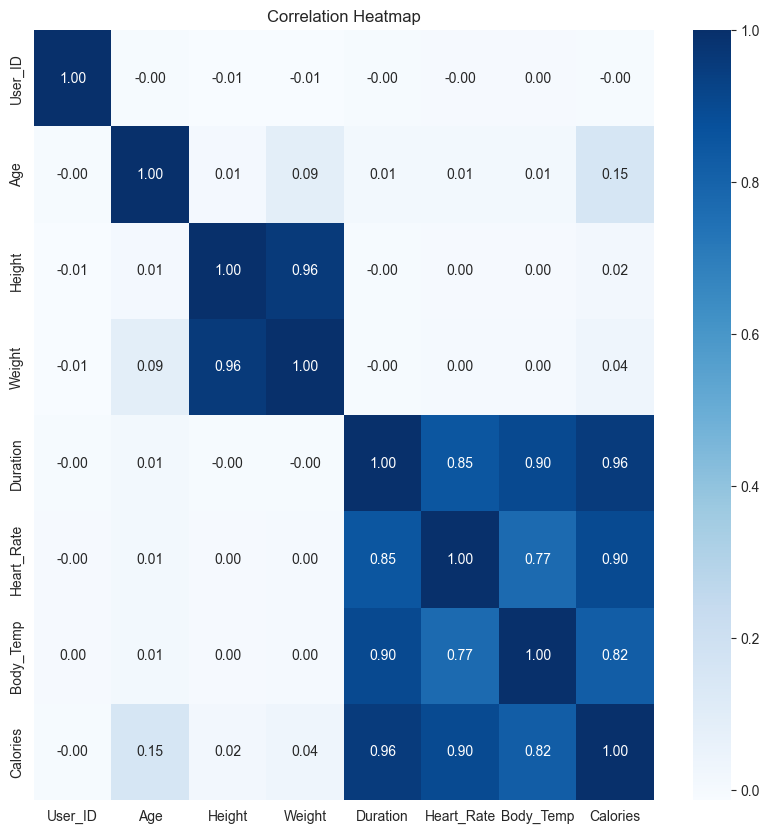

In [85]:
# Create a heatmap to visualize the correlation between numeric variables
calories_data_numeric = calories_data.select_dtypes(include='number')
correlation = calories_data_numeric.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, annot=True, fmt='.2f' , cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [86]:
# Convert categorical 'Gender' column to numerical values
calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})

In [87]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [88]:
# Define features (X) and target variable (y)
X = calories_data.drop(columns=['Calories', 'User_ID'])
y = calories_data['Calories']

In [89]:
# Standardize the selected numerical features for better model performance
scaler = StandardScaler()
columns_for_scale = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate']
X[columns_for_scale] = scaler.fit_transform(X[columns_for_scale])

In [90]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [91]:
# Initialize and train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

In [93]:
# Evaluate model using metrics scores
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

In [94]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Absolute Error (MAE): 1.48
Mean Squared Error (MSE): 4.71
Root Mean Squared Error (RMSE): 2.17
R2 Score: 1.00
